<a href="https://colab.research.google.com/github/qilinggg/coursera-test/blob/master/retail_industry_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import collections
import plotly
import plotly.graph_objects as go
import scipy.stats.mstats as mstats
import scipy.stats as stats
import locale
import PIL
from PIL import Image
import io
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
# Count number of properties and number of sales
import collections
%matplotlib inline

locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

obtain multiparcel/cross debt sales:
- take the sum of square footage across all properties involved
- find the price per square foot
- allocate price based on square foot 

In [61]:
print(len(pd.read_csv("retail_full_db.csv")))
pd.read_csv("retail_full_db.csv").columns

59730


Index(['property_id', 'uniqueId', 'salesId', 'std_land_use_code_description',
       'sale_date', 'sale_amount', 'building_area'],
      dtype='object')

In [62]:
df = pd.read_csv("retail_full_db.csv",error_bad_lines=False)
df.columns = ["id", "unique_id", "trx_id", "asset_type", "date","sale_amount", "building_area"]

# col = df.columns[1:]
# df = df[col]
print(len(df))
df["date"] = df["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
print(df.dtypes)
display(df.head())

59730
id                       object
unique_id                object
trx_id                   object
asset_type               object
date             datetime64[ns]
sale_amount             float64
building_area           float64
dtype: object


,id,unique_id,trx_id,asset_type,date,sale_amount,building_area
0,92bc3e7c-ae46-431b-bc3e-7cae46431b29,suid-3f8f6297-7216-521c-91dc-270ffc83390c,sid-b117ae8c-bbdb-5981-b83d-79d7b52baa62,Department Store,2017-02-02,1747378.0,9100.0
1,e1592752-311d-5641-a734-66c72c4eca29,suid-9763eee3-f154-5df0-8db6-43d4ae7af74f,sid-2d9499df-dc23-5c49-830c-feefe18fb8a9,Fast Food Restaurant,2011-03-30,2317400.0,3477.0
2,f5e5ab32-8c79-5aea-8159-da80bc042b5b,suid-7ed0b643-beca-538e-b509-28a73ea5ffb2,sid-ae6790bb-3424-5a4a-9405-18a3802c8331,Fast Food Restaurant,2006-10-20,700000.0,3551.0
3,f5e5ab32-8c79-5aea-8159-da80bc042b5b,suid-e0dce486-d2b7-53b5-9d3a-3982031d9e8e,sid-ae35e035-0165-57c5-a190-6a4de7ff8896,Fast Food Restaurant,2000-07-24,687500.0,3551.0
4,2c244f36-df6f-5cc7-a7e1-b3c89311027d,suid-a41b6988-0930-551b-b708-27c854d2c7b6,sid-6db5038e-b145-5f83-8b00-3f64e25a22d1,Department Store,2007-01-26,335000.0,12756.0


In [0]:
df = df[df["sale_amount"] > 10000]

In [86]:
multiparcel_id[0]
display(df.loc[df["trx_id"] == multiparcel_id[0]])
(df.loc[df["trx_id"] == multiparcel_id[0], "sale_amount"])/sum(df.loc[df["trx_id"] == multiparcel_id[0], "building_area"])

,id,unique_id,trx_id,asset_type,date,sale_amount,building_area,price_sqft,year_month,year
13,d7ffd3fa-5093-5037-8b35-b70cd5eac4d1,suid-81d5292a-b319-58f3-ad3f-38c665cf8be4,sid-6327c5b9-b527-51de-b1a3-75c21dc2a18e,Automotive Repair Shop,2006-04-27,1100000.0,8841.0,124.420314,2006-04,2006
16837,962a9615-9113-4b09-aa96-1591135b096c,suid-ec36d9c7-1a03-54d7-ad07-3c9f4b72d574,sid-6327c5b9-b527-51de-b1a3-75c21dc2a18e,Automotive Repair Shop,2006-04-27,1100000.0,8841.0,124.420314,2006-04,2006


13       62.210157
16837    62.210157
Name: sale_amount, dtype: float64

In [87]:
print(len(df["trx_id"].unique()))
num_sales_per_id = pd.DataFrame.from_dict(collections.Counter(df["trx_id"]), orient="index", columns=["count"])
multiparcel_id = list(num_sales_per_id[num_sales_per_id["count"] > 1].index)
# non_multiparcel_id = list(num_sales_per_id[num_sales_per_id["count"] == 1].index)
# print(len(multiparcel_id))

df["price_sqft"] = df["sale_amount"]/df["building_area"]

for multiparcel in multiparcel_id:
    print("multi", multiparcel)
    df.loc[df["trx_id"] == multiparcel, "price_sqft"] = (df.loc[df["trx_id"] == multiparcel, "sale_amount"])/sum(df.loc[df["trx_id"] == multiparcel, "building_area"])


51034
6667
multi sid-6327c5b9-b527-51de-b1a3-75c21dc2a18e
multi sid-957f9c0e-8d71-5e9c-9e7d-a9071004b673
multi sid-a48ac6c0-c847-5a1f-a982-b2e1650ae29a
multi sid-173d000a-fa46-5852-beb6-cccd479ac336
multi sid-d029565f-0165-553f-a7d5-c4187867193c
multi sid-2358b44f-3dcd-5669-878a-290794c29882
multi sid-3a300b15-3e96-5e8f-8224-92dd035dd29c
multi sid-8eea8cbd-c1c2-562a-a25f-d7ddd5002c33
multi sid-d2b5e887-6708-5ca8-8f93-a702ef7966ec
multi sid-1c12dee4-ee7e-510b-9718-5c830d64ce60
multi sid-049b5076-653b-53b7-af94-8d323a5b8261
multi sid-2e032658-8f0e-5bdb-87f7-a65e48cd8b57
multi sid-5a9c4d4c-1cd4-53fb-b70f-e956bae51fb2
multi sid-9db8dea4-97f2-5818-a69f-b7868943b710
multi sid-584b8a7d-689d-5040-ae37-6d011c19c622
multi sid-a01161d7-4706-51c4-96ef-40cc6a732eed
multi sid-c16b661f-a65f-5652-acf0-2760861dfa16
multi sid-9e26d76c-0dfa-51f2-a71c-9200bd922644
multi sid-8f100ee9-29ae-5fb1-a640-771109c771f3
multi sid-d4a16692-d484-5eb4-829b-e9166e9ade75
multi sid-c98634ea-faf4-59a8-8bfa-530722ab706e
mu

In [88]:
df["year_month"] = df["date"].apply(lambda x: datetime.strftime(x, "%Y-%m"))
df["year"] = df["date"].apply(lambda x: datetime.strftime(x, "%Y"))
df["year_month"].head(5)

0    2017-02
1    2011-03
2    2006-10
3    2000-07
4    2007-01
Name: year_month, dtype: object

Grouping sales by Market, followed by Asset Type
- Looked at Asset Types that have at least 30 sales in 6 month window


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [89]:
# df[["year", "year_month"]].dtypes
years = sorted(df["year"].unique())
year_months = sorted(df["year_month"].unique())
print(years)
print(year_months)

['1930', '1932', '1958', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
['1930-10', '1932-04', '1958-04', '1961-02', '1961-05', '1962-01', '1962-11', '1963-03', '1963-10', '1963-11', '1964-02', '1964-06', '1965-01', '1965-04', '1966-02', '1967-01', '1967-11', '1968-01', '1968-08', '1968-09', '1968-10', '1969-07', '1969-09', '1969-12', '1970-04', '1970-05', '1970-07', '1970-08', '1971-04', '1971-06', '1971-07', '1971-10', '1972-01', '1972-04', '1972-05', '1972-08', '1973-01', '1973-02', '1973-03', '1973-06', '1973-08', '1973-09', '1973-10', '1973-11', '1973-12', '1974-0

In [0]:
df["year"] = df["year"].apply(int)

In [0]:
# interested in sales since 1990
since_1981 = df[df["year"] >= 1990]

In [92]:
years = sorted(since_1981["year"].unique())
year_months = sorted(since_1981["year_month"].unique())
print(years)
print(year_months)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06', '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12', '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06', '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12', '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06', '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12', '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06', '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12', '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06', '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12', '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06', '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12', '1996-01', '1996-02', '199

In [0]:
# # get the trailing 3month dataset
# count =0
# fig, axs = plt.subplots(8)
# for i in range(len(year_months)):
#     if count < 10:
#         #timeframe
#         tf = sorted(year_months)[i-2:i+1]
#         if len(tf) == 0:
#             continue
#         else:
#             axs[count] = plt.subplot(221+count)
#             temp = df[df['year_month'].isin(tf)]
#             # sns.distplot(temp["sale_amount"], fit=norm)
#             print(tf)
#             log_sales = np.log(temp["price_sqft"])
#             # log_sales = log_sales[log_sales > np.percentile(log_sales, 25)]
#             res = stats.probplot(log_sales, plot= plt)
#             count+=1
#     else:
#         break        

In [0]:
# this function takes a dataframe, finds the asset type which has at least 60 sales
# takes the log price per squarefoot and rules out the outliers per asset type

def rule_outlier(df):
    assets = df["asset_type"].unique()
    return_df = []
    for asset in assets:
        temp = df[df["asset_type"] == asset]
        if len(temp) < 30:
#might have a problem here
            continue
        
        log_sales = pd.DataFrame(np.log(temp["price_sqft"]))
        temp["log_sales"] = log_sales
        scaler = StandardScaler()
        temp["norm_log_sale"] = scaler.fit_transform(log_sales)
        keep = temp[(temp["norm_log_sale"] < 1.96) & (temp["norm_log_sale"] > -1.96)]
        return_df.append(keep)
    return pd.concat(return_df)
        


In [94]:
first_6_mth = sorted(year_months)[:6]
temp_df = since_1981[since_1981["year_month"].isin(first_6_mth)]
print(len(temp_df))
print(len(rule_outlier(temp_df)))

166
109


In [0]:
# remove the outliers based on their log-values
# get the trailing 6month dataset
df_no_outlier = []
# this array contains all dataframes

for i in range(6,len(year_months)):
    #timeframe
    tf = sorted(year_months)[i-6:i]
    if len(tf) == 0:
        continue
    else:
        temp = df[df['year_month'].isin(tf)]
        temp["mth_df"] = sorted(year_months)[i-1]
        df_no_outlier.append(rule_outlier(temp))


In [0]:
# in df_no_outlier, it's a df in each entry

# tf refers to timeframe
def calc_weights(df,tf):
    weights = {}
    if tf == "years":
        tf = sorted(df["year"].unique())
        tf_name = "year"
    if tf == "months":
        tf = sorted(df["year_month"].unique())
        tf_name = "year_month"

    for t in tf:
        weights.setdefault(str(t), {})
        temp_df = df[df[tf_name] == str(t)]
        temp_assets = temp_df["asset_type"].unique()

        for asset in temp_assets:
            weights[str(t)][asset] = sum(temp_df[temp_df["asset_type"] == asset]["sale_amount"])/sum(temp_df["sale_amount"])
    return pd.DataFrame.from_dict(weights, orient="index")

def calc_single_weights(df):
    weights={}
    assets = df["asset_type"].unique()
    df1 = remove_multiparcel(df)
    for asset in assets:
        weights[asset] = sum(df1[df1["asset_type"]==asset]["sale_amount"])/sum(df1["sale_amount"])
    
    return pd.DataFrame.from_dict(weights, orient="index", columns=["weights"])

def remove_multiparcel(df):
    multiparcel_sales = df[df["trx_id"].isin(multiparcel_id)]
    multiparcel_sales_id = list(multiparcel_sales["trx_id"].unique())
    mp_sales_index = list(multiparcel_sales.index)
    print("number of multiparcel sales:",len(multiparcel_sales))
    print("number of unique sales:", len(multiparcel_sales_id))
    df1 = df.copy()
    df1.drop(mp_sales_index, inplace=True)
    mp_df = [multiparcel_sales[multiparcel_sales["trx_id"] == mp_id].iloc[[0]] for mp_id in multiparcel_sales_id]
    mp_df.append(df1)
    return pd.concat(mp_df)


def get_single_price_sqft(df):
    prices={}
    assets = df["asset_type"].unique()
    df1 = remove_multiparcel(df)

    for asset in assets:
        print(asset, len(df[df["asset_type"] == asset]))
        prices[asset] = sum(df1[df1["asset_type"]==asset]["sale_amount"])/sum(df[df["asset_type"] == asset]["building_area"])
    
    return pd.DataFrame.from_dict(prices, orient="index", columns=["price_sqft"])


def get_price_sqft(df, tf):
    prices = {}

    if tf == 'years':
        tf = sorted(df["year"].unique())
        tf_name = "year"
    if tf == 'months':
        tf = sorted(df["year_month"].unique())
        tf_name = "year_month"
    
    for t in tf:
        prices.setdefault(str(t), {})
        temp_df = df[df[tf_name] == str(t)]
        temp_assets = temp_df["asset_type"].unique()

        for asset in temp_assets:
            prices[str(t)][asset] = sum(temp_df[temp_df["asset_type"] == asset]["sale_amount"])/sum(temp_df["building_area"])
    return pd.DataFrame.from_dict(prices, orient="index")

def get_single_price(w_df, p_df):
    # check that asset types are the same
    w_type = sorted(w_df.index)
    p_type = sorted(p_df.index)
    if w_type == p_type:
        return sum(w_df["weights"]*p_df["price_sqft"])
    else:
        return -1
 
  
def get_overall_price(weights_df, price_df):
    overall_ind = {}
    weights_tf = sorted(weights_df.index)
    price_tf = sorted(price_df.index)
    # making sure that the timeframes are the same
    if not (weights_tf == price_tf):
        print("wrong timeframes!")
        return -1
    else:
        for t in price_tf:
            overall_ind[t] = sum(weights_df.loc[t] * price_df.loc[t])
    return pd.DataFrame.from_dict(overall_ind, orient="index", columns=["weighted_price_sqft"])

In [135]:
a = df_no_outlier[0]
print(len(a))
print(len(remove_multiparcel(a)))

109
number of multiparcel sales: 33
number of unique sales: 17
93


In [136]:
display(calc_single_weights(df_no_outlier[0]))
display(get_single_price_sqft(df_no_outlier[0]))
print(get_single_price(calc_single_weights(df_no_outlier[0]),get_single_price_sqft(df_no_outlier[0])))

number of multiparcel sales: 33
number of unique sales: 17


,weights
Retail Stores,0.705665
Automotive Repair Shop,0.294335


number of multiparcel sales: 33
number of unique sales: 17
Retail Stores 69
Automotive Repair Shop 40


,price_sqft
Retail Stores,41.825155
Automotive Repair Shop,30.851039


number of multiparcel sales: 33
number of unique sales: 17
number of multiparcel sales: 33
number of unique sales: 17
Retail Stores 69
Automotive Repair Shop 40
38.595087090585146


In [98]:
sorted(df_no_outlier[0]["year_month"].unique())

['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06']

In [99]:
display(df_no_outlier[0].head())

,id,unique_id,trx_id,asset_type,date,sale_amount,building_area,price_sqft,year_month,year,mth_df,log_sales,norm_log_sale
19,f71fa327-f21f-50a1-85d3-f8a21a876f5a,suid-c72ca0d1-0376-5bf4-a45f-7559f8fe2583,sid-a48ac6c0-c847-5a1f-a982-b2e1650ae29a,Retail Stores,1990-04-03,95000.0,3892.0,12.204522,1990-04,1990,1990-06,2.501807,-0.684578
2683,0e17be3e-13f5-5ef2-a006-62c659925916,suid-80920695-9f48-592c-93ee-359e8b3f5836,sid-70074134-a5e9-57e7-808f-876a597fb5b1,Retail Stores,1990-03-01,3745000.0,42830.0,47.266853,1990-03,1990,1990-06,3.855809,0.480494
2810,59b63fc0-b561-5367-a67b-e043b8e709e3,suid-597c75fb-50e5-5056-9dc4-c0a03c58e30f,sid-538e426e-07e3-5afa-8f25-6220c8d77f9e,Retail Stores,1990-03-01,2443000.0,18245.0,32.561611,1990-03,1990,1990-06,3.483134,0.159820
4017,1a92b732-c8ba-5645-aa8c-636d5b4d9ea6,suid-4e3cdb21-5005-539c-8816-96d866fb6f41,sid-a27f3f71-b2bf-5961-bfdf-d3797f747e57,Retail Stores,1990-01-03,64900.0,1075.0,60.372093,1990-01,1990,1990-06,4.100527,0.691065
4365,99aa849a-60f4-54a9-bfdb-3b11f1241ebd,suid-0765503f-ccdf-5d70-af70-b4fb0e56b00b,sid-1e2bbf73-5095-50d6-8138-1ac1ba2dffd0,Retail Stores,1990-05-01,1390400.0,25825.0,53.839303,1990-05,1990,1990-06,3.986004,0.592522


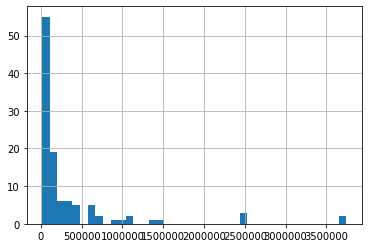

In [100]:
df_no_outlier[0]["sale_amount"].hist(bins=40)

In [141]:
months_inv = []
prices = []

for temp in df_no_outlier:
    months_inv.append(datetime.strptime(temp["mth_df"].unique()[0], "%Y-%m"))
    print(temp["mth_df"].unique())
    for month in sorted(temp["year_month"].unique()):
        print(month, len(temp[temp["year_month"] == month]))
    temp_weights = calc_single_weights(temp)
    temp_prices = get_single_price_sqft(temp)
    overall_price = get_single_price(temp_weights, temp_prices)
    prices.append(overall_price)
    print("===============================")
time_series_df = pd.DataFrame.from_dict(dict(months=months_inv, prices=prices), orient="columns")
fig = go.Figure(data=[go.Scatter(x=months_inv, y = prices)])
fig.update_layout(title="monthly rolling price per sqft")
fig.update_yaxes(title="Price ($)")
fig.update_xaxes(title="month")

['1990-06']
1990-01 27
1990-02 23
1990-03 21
1990-04 19
1990-05 9
1990-06 10
number of multiparcel sales: 33
number of unique sales: 17
number of multiparcel sales: 33
number of unique sales: 17
Retail Stores 69
Automotive Repair Shop 40
['1990-07']
1990-02 22
1990-03 21
1990-04 19
1990-05 9
1990-06 10
1990-07 14
number of multiparcel sales: 36
number of unique sales: 18
number of multiparcel sales: 36
number of unique sales: 18
Retail Stores 65
Automotive Repair Shop 30
['1990-08']
1990-03 15
1990-04 11
1990-05 7
1990-06 6
1990-07 12
1990-08 4
number of multiparcel sales: 24
number of unique sales: 12
number of multiparcel sales: 24
number of unique sales: 12
Retail Stores 55
['1990-09']
1990-04 11
1990-05 7
1990-06 6
1990-07 12
1990-08 4
1990-09 8
number of multiparcel sales: 19
number of unique sales: 10
number of multiparcel sales: 19
number of unique sales: 10
Retail Stores 48
['1990-10']
1990-05 7
1990-06 6
1990-07 12
1990-08 4
1990-09 8
1990-10 6
number of multiparcel sales: 16


In [142]:
time_series_df["3month_ma"] = time_series_df['prices'].rolling(window=3,min_periods=3).mean()
time_series_df["6month_ma"] = time_series_df['prices'].rolling(window=6,min_periods=6).mean()
time_series_df["12month_ma"] = time_series_df['prices'].rolling(window=12,min_periods=12).mean()
fig.add_trace(go.Scatter(x=time_series_df["months"], y=time_series_df["3month_ma"], name="3"))
fig.add_trace(go.Scatter(x=time_series_df["months"], y=time_series_df["6month_ma"], name="6"))
fig.add_trace(go.Scatter(x=time_series_df["months"], y=time_series_df["12month_ma"], name="12"))
fig.show()

In [0]:
time_series_df.to_csv("index_multiparcel.csv")

In [0]:
files.download("index_multiparcel.csv")

In [151]:
v gt# transforming price index into a value
# taking Jan 2000 as the base

index_ts = time_series_df.copy()
# index_ts.set_index("months", inplace=True)
index_ts = index_ts.loc[index_ts["months"] >= '2000-01-01']
index_ts.set_index("months", inplace=True)
index_ts["index"] = index_ts["prices"].apply(lambda x: x/index_ts["prices"].iloc[0] * 100)
index_ts["index_3mth"] = index_ts["3month_ma"].apply(lambda x: x/index_ts["3month_ma"].iloc[0] * 100)
index_ts["index_6mth"] = index_ts["6month_ma"].apply(lambda x: x/index_ts["6month_ma"].iloc[0] * 100)
index_ts["index_12mth"] = index_ts["12month_ma"].apply(lambda x: x/index_ts["12month_ma"].iloc[0] * 100)
index_ts.head(20)

,prices,3month_ma,6month_ma,12month_ma,index,index_3mth,index_6mth,index_12mth
months,,,,,,,,
2000-01-01,48.989011,50.371139,51.925065,53.448778,100.000000,100.000000,100.000000,100.000000
2000-02-01,48.292551,49.312345,50.774493,52.595482,98.578334,97.898016,97.784169,98.403526
2000-03-01,46.868258,48.049940,49.316210,51.719264,95.670963,95.391809,94.975731,96.764167
2000-04-01,51.570698,48.910502,49.640820,51.181676,105.269930,97.100252,95.600883,95.758365
2000-05-01,59.369862,52.602939,50.957642,51.722465,121.190163,104.430714,98.136887,96.770155
2000-06-01,61.469421,57.469994,52.759967,52.714103,125.475938,114.093101,101.607898,98.625460
2000-07-01,67.806659,62.881981,55.896242,53.910653,138.411977,124.837323,107.647899,100.864146
2000-08-01,74.605202,67.960427,60.281683,55.528088,152.289668,134.919379,116.093612,103.890286
2000-09-01,74.749743,72.387201,64.928597,57.122404,152.584716,143.707693,125.042882,106.873171


In [156]:
fig_ind = go.Figure()

fig_ind.add_trace(go.Scatter(x=index_ts.index, y=index_ts["index"], name="original"))
fig_ind.add_trace(go.Scatter(x=index_ts.index, y=index_ts["index_3mth"], name="3"))
fig_ind.add_trace(go.Scatter(x=index_ts.index, y=index_ts["index_6mth"], name="6"))
fig_ind.add_trace(go.Scatter(x=index_ts.index, y=index_ts["index_12mth"], name="12"))

fig_ind.update_layout(title="Reonomy Retail Index")
fig_ind.show()

In [0]:
from google.colab import files
time_series_df.to_csv("index.csv")


In [0]:
files.download('index.csv')

In [0]:
df["year_month"] = df["year_month"].apply(lambda x: datetime.strptime(x, "%Y-%m"))

In [26]:
# Count number of properties and number of sales
print("Number of unique properties:", len(df["id"].unique()))
sale_per_id = pd.DataFrame.from_dict(dict(collections.Counter(df["id"])),
                                     orient="index", columns=["count_sales"])

# number of properties that have more than 1 sale
print("Number of properties that have more than 1 sale:",len(sale_per_id[sale_per_id["count_sales"] > 1]))

for month in year_months:
    temp_full_df = df[df["year_month"] <= month]
    temp_sale_per_id = pd.DataFrame.from_dict(
        dict(collections.Counter(temp_full_df["id"])), orient="index",
        columns=["count_sales"]
    )
    # sales that happen within the same month
    temp_month_df = df[df["year_month"] == month]
    temp_ids = temp_month_df["id"].unique()
    temp_id_df_sales = temp_sale_per_id.loc[temp_ids]
    print(month, len(temp_month_df), len(temp_id_df_sales[temp_id_df_sales["count_sales"] > 1]))

Number of unique properties: 20061
Number of properties that have more than 1 sale: 14941
1990-01 40 9
1990-02 35 3
1990-03 30 8
1990-04 27 6
1990-05 13 3
1990-06 21 6
1990-07 23 6
1990-08 16 4
1990-09 19 2
1990-10 24 3
1990-11 23 4
1990-12 18 2
1991-01 49 11
1991-02 25 11
1991-03 32 11
1991-04 72 17
1991-05 76 17
1991-06 72 10
1991-07 52 10
1991-08 76 18
1991-09 67 20
1991-10 60 17
1991-11 43 15
1991-12 100 34
1992-01 94 28
1992-02 61 20
1992-03 81 25
1992-04 122 26
1992-05 61 12
1992-06 64 20
1992-07 80 16
1992-08 55 15
1992-09 69 18
1992-10 55 20
1992-11 59 35
1992-12 109 35
1993-01 81 28
1993-02 54 19
1993-03 89 47
1993-04 85 34
1993-05 60 22
1993-06 85 27
1993-07 84 33
1993-08 91 27
1993-09 88 33
1993-10 74 37
1993-11 70 19
1993-12 102 38
1994-01 72 25
1994-02 49 14
1994-03 86 29
1994-04 95 24
1994-05 93 26
1994-06 99 33
1994-07 101 36
1994-08 85 26
1994-09 98 30
1994-10 87 34
1994-11 124 48
1994-12 144 71
1995-01 83 28
1995-02 58 24
1995-03 81 29
1995-04 80 28
1995-05 76 25
1995-